In [1]:
from obspy import read
from obspy.signal.trigger import ar_pick
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
st1 = read('data/earthquake/st1.SAC')
st2 = read('data/earthquake/st2.SAC')
st3 = read('data/earthquake/st3.SAC')

threechannels = read('data/earthquake/st1.SAC')
threechannels += read('data/earthquake/st2.SAC')
threechannels += read('data/earthquake/st3.SAC')

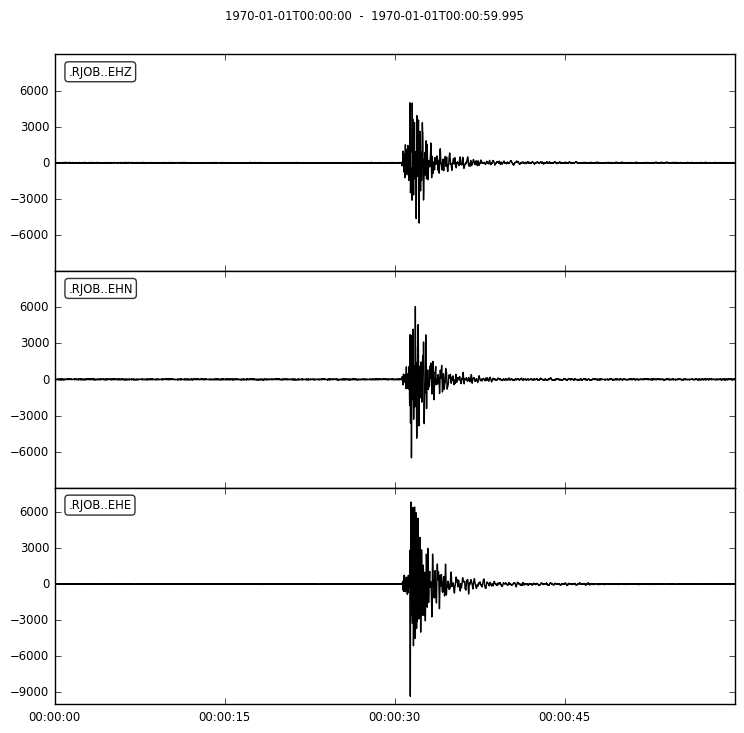

In [3]:
threechannels.plot()

In [4]:
tr1 = st1[0]
tr2 = st2[0]
tr3 = st3[0]

In [5]:
0.2/0.005

40.0

In [6]:
tr1

#1200 is number of samples
#1 / 200 is sampling rate, which is 0.005 s. In other words, they record something in the range of 0.005s

.RJOB..EHE | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:59.995000Z | 200.0 Hz, 12000 samples

In [7]:
# Number of samplepoints
number_of_samples = st3[0].stats.npts
# sample spacing
sampling_rate = 1/st3[0].stats.sampling_rate

In [8]:
#trx.data refers to amplitude of waveform

tr1.data
tr2.data
tr3.data

array([ 14.,  11., -18., ...,  12.,   2.,   0.], dtype=float32)

In [9]:
#scaling numbers

#f(x)= ((b-a)*(x-min)/(max-min))+a
#b=desired value(upper bound)
#a=desired value(lower bound)
#max=known value(uppder bound)
#min=known value(lower bound)

Mt1 = np.sqrt((tr1.data)**2) 
Mt2 = np.sqrt((tr2.data)**2)
Mt3 = np.sqrt((tr3.data)**2)

#input must be 0 < input <= 1
tr1 = ((1-0.01)*(Mt1-np.min(Mt1))/(np.max(Mt1)-np.min(Mt1)))+0.01
tr2 = ((1-0.01)*(Mt2-np.min(Mt2))/(np.max(Mt2)-np.min(Mt2)))+0.01
tr3 = ((1-0.01)*(Mt3-np.min(Mt3))/(np.max(Mt3)-np.min(Mt3)))+0.01

In [10]:
#create x values for the time series
#sampling rate is 200 Hz, so we obtained data for each 1/200 = 0.005 s
#start from zero, ends in 60s

t = np.arange(0,sampling_rate*number_of_samples,sampling_rate)

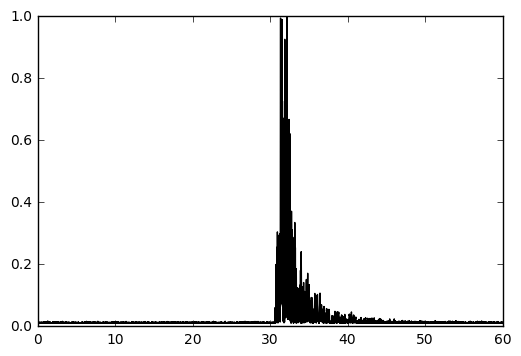

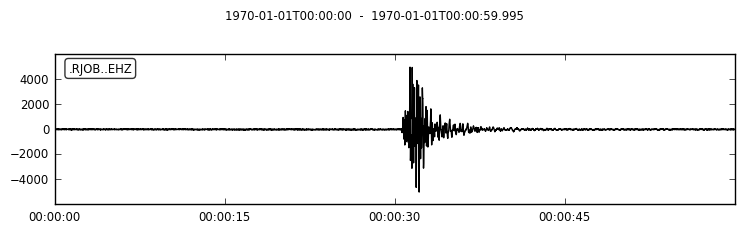

In [11]:
#plot scaled input, since input to neural network must lie between 0 and 1
#subplot is a method that plot multiple graph in one window
#33x means 3 of them are placed on the same line
#axis is a method to plot the graph with a given axis([xmin,xmax,ymin,ymax])

#plt.subplot(311)
#plt.plot(t,tr1)
#plt.subplot(312)
#plt.plot(t,tr2)
#plt.subplot(313)
plt.plot(t,tr3,'k')



#st1.plot()
#st2.plot()
st3.plot()

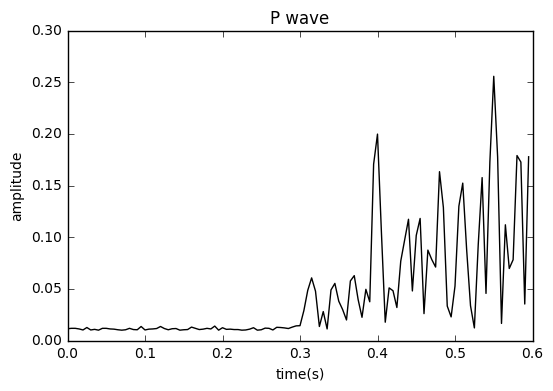

In [12]:
#P wave detected at ~30.6s
# tr3[6066:6186]

plt.title('P wave')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.plot(np.arange(0,sampling_rate*120,sampling_rate),tr3[6066:6186],'k')

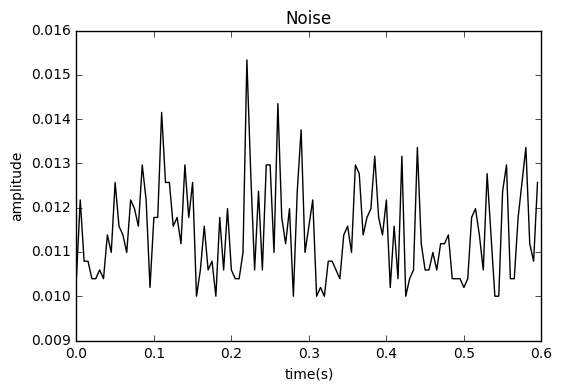

In [13]:
plt.title('Noise')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.plot(np.arange(0,sampling_rate*120,sampling_rate),tr3[2400:2520],'k')

In [14]:
#add noise

noise1 = []

for i in range(0,6000,60):
    noise1.append(tr3[i:(i+120)])
noise1 = np.array(noise1)
#zeros1 = np.zeros((noise1.shape[0],1),dtype=int)
#noise_training = np.array(np.append(zeros1,noise1,axis=1),dtype=int)

#add p
p = tr3[6066:6186]
p_wave = []

for i in np.linspace(0.1,0.9,100):
    p_wave.append(p*i)
p_wave = np.array(p_wave)
#ones = np.ones((p_wave.shape[0],1),dtype=int)
#p_training = np.array(np.append(ones,p_wave,axis=1,),dtype=int)

In [15]:
#save the array to csv

#np.savetxt('noise_training.csv',noise1,delimiter=',',fmt="%s")
#np.savetxt('pwave_training.csv',p_wave,delimiter=',',fmt="%s")

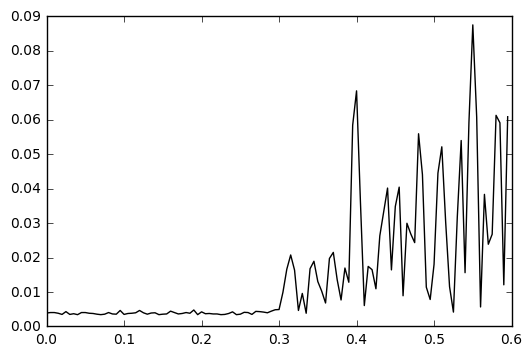

In [24]:
#double check the p wave
plt.plot(np.arange(0,sampling_rate*120,sampling_rate),p_wave[30],'k')

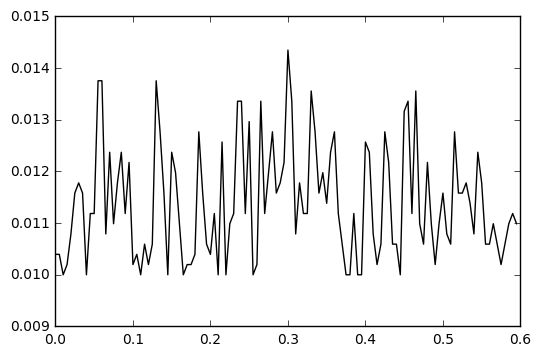

In [17]:
#double check the noise
plt.plot(np.arange(0,sampling_rate*120,sampling_rate),noise1[96],'k')

In [18]:
#S wave detected at ~30.6s

#plt.title('S wave')
#plt.xlabel('time(s)')
#plt.ylabel('amplitude')
#plt.plot(np.arange(0,0.6,0.005),tr2[6180:6300])